<a href="https://colab.research.google.com/github/Zaqi-Surya/Energy-Cinsumption-EDA-and-Prediction/blob/main/Energy_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ENERGY CONSUMPTION**
*Exploratory Data Analysis and Prediction*

In [ ]:
#IMPORT LIBRABRY

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
wanings.simplefilter('ignore')

In [ ]:
#LOAD DATA

df_train = pd.read_csv("/test_energy_data.csv")
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    object 
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    object 
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    object 
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    object 
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [ ]:
df_train.isna().sum()

,0
Building Type,0
Square Footage,0
Number of Occupants,0
Appliances Used,0
Average Temperature,0
Day of Week,0
Energy Consumption,0


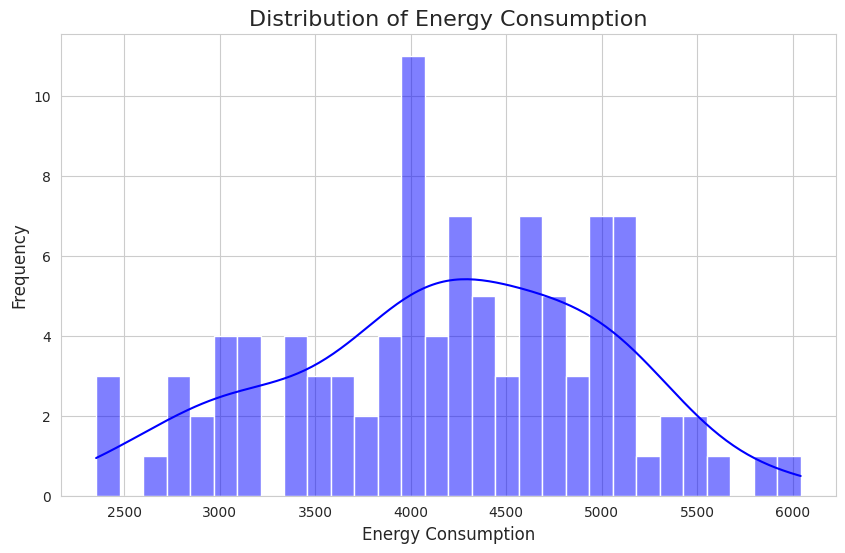

In [ ]:
#Exploratory Data Analysis
#~Histogram for EC
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Energy Consumption'], bins=30, kde=True, color='blue')
plt.title('Distribution of Energy Consumption', fontsize=16)
plt.xlabel('Energy Consumption', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


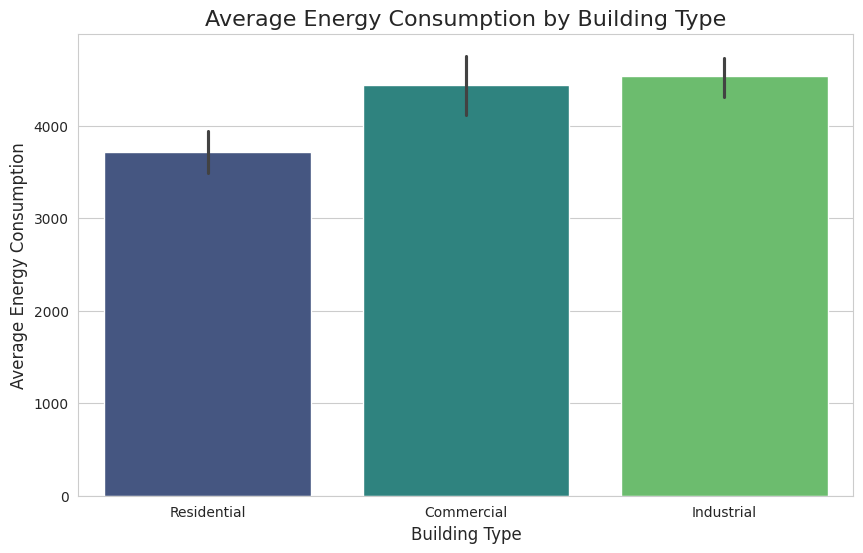

In [ ]:
#~Average EC by Building Type

plt.figure(figsize=(10, 6))
sns.barplot(data=df_train, x='Building Type', y='Energy Consumption', hue='Building Type', palette='viridis')
plt.title('Average Energy Consumption by Building Type', fontsize=16)
plt.xlabel('Building Type', fontsize=12)
plt.ylabel('Average Energy Consumption', fontsize=12)
plt.show()

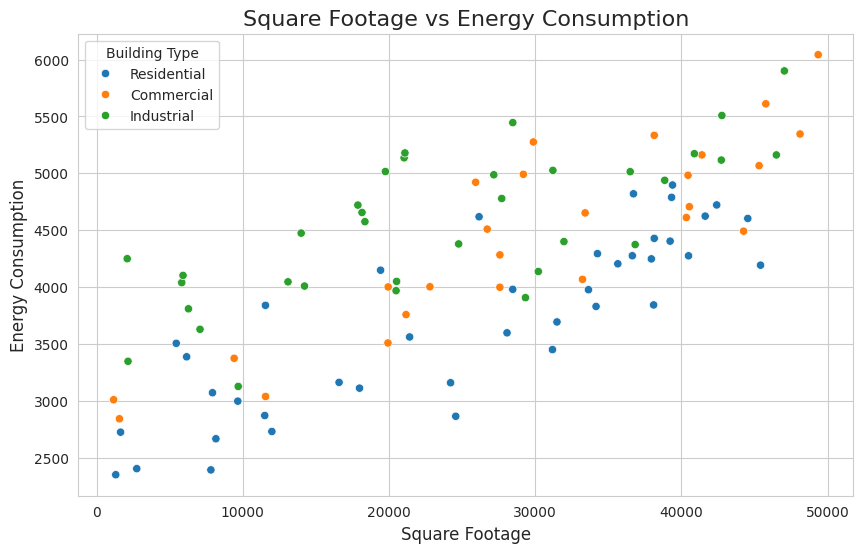

In [ ]:
#~Square Footage vs EC

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x='Square Footage', y='Energy Consumption', hue='Building Type', palette='tab10')
plt.title('Square Footage vs Energy Consumption', fontsize=16)
plt.xlabel('Square Footage', fontsize=12)
plt.ylabel('Energy Consumption', fontsize=12)
plt.legend(title='Building Type')
plt.show()

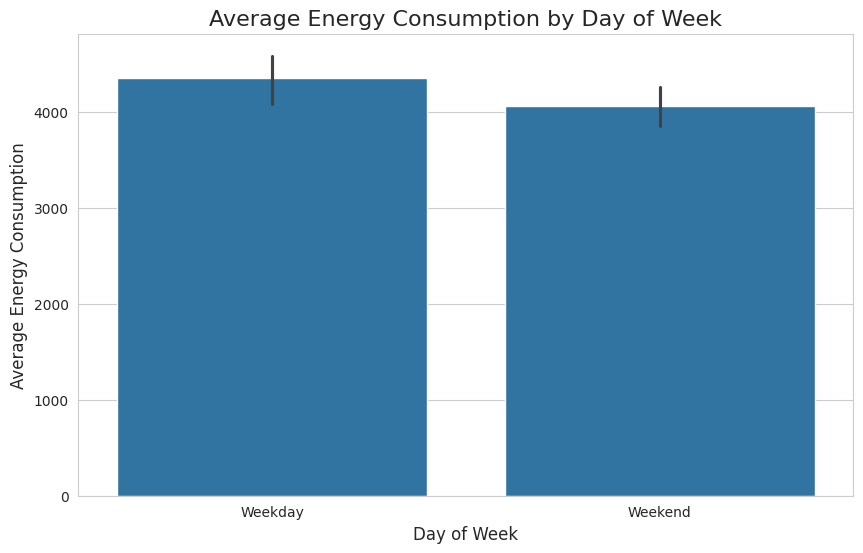

In [ ]:
#~Average EC by Day of Week

plt.figure(figsize=(10, 6))
sns.barplot(data=df_train, x='Day of Week', y='Energy Consumption')
plt.title('Average Energy Consumption by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Energy Consumption', fontsize=12)
plt.show()

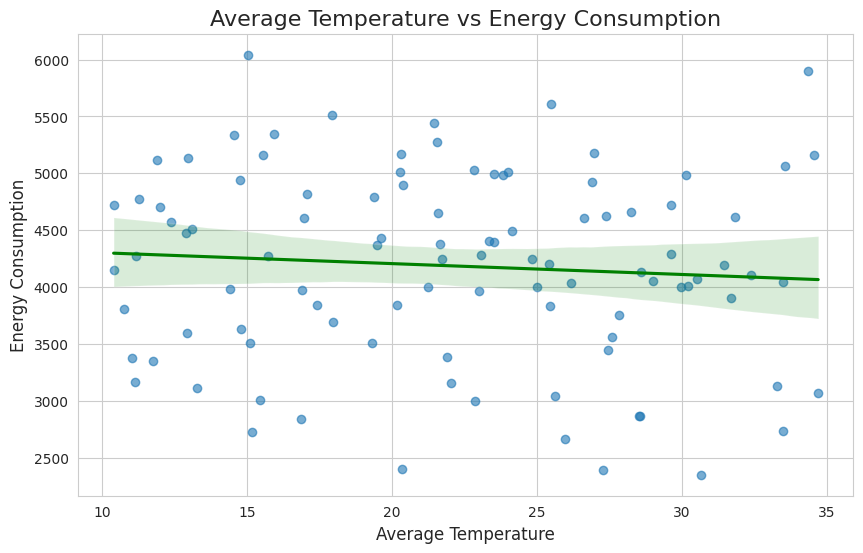

In [ ]:
#~Regression plot for Average Temperature vs EC

plt.figure(figsize=(10, 6))
sns.regplot(data=df_train, x='Average Temperature', y='Energy Consumption', scatter_kws={'alpha':0.6}, line_kws={'color':'green'})
plt.title('Average Temperature vs Energy Consumption', fontsize=16)
plt.xlabel('Average Temperature', fontsize=12)
plt.ylabel('Energy Consumption', fontsize=12)
plt.show()

In [ ]:
#MODEL BUILDING

df_train.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


In [ ]:
#~One Hot Encoding for Categorical features

df_train_encoded = pd.get_dummies(df_train, columns=['Building Type', 'Day of Week'], drop_first=True)
df_train_encoded.head()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Industrial,Building Type_Residential,Day of Week_Weekend
0,24563,15,4,28.52,2865.57,False,True,False
1,27583,56,23,23.07,4283.80,False,False,True
2,45313,4,44,33.56,5067.83,False,False,False
3,41625,84,17,27.39,4624.30,False,True,True
4,36720,58,47,17.08,4820.59,False,True,False


In [ ]:
#1. Random Forest

x = df_train_encoded.drop(columns=['Energy Consumption'])
y = df_train_encoded['Energy Consumption']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)
rmse_rf = mean_squared_error(y_test, y_pred)

print(f"Random Forest RMSE (Root Mean Squared Error): {rmse_rf}")

Random Forest RMSE (Root Mean Squared Error): 147750.0216443327


In [ ]:
#~Lets fine tune Random Forest

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# GridSearchCV with RandomForestRegressor
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best parameters and best rmse
best_params = grid_search.best_params_
best_rmse = -grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best RMSE from GridSearchCV: {best_rmse}")

# Re-training the model with the best parameters
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(x_test)
rmse_best =  np.sqrt(mean_squared_error(y_test, y_pred_best))

print(f"RMSE after Hyperparameter Tuning: {rmse_best}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE from GridSearchCV: 149651.71257684863
RMSE after Hyperparameter Tuning: 382.1392875085667


In [ ]:
# 2. Gradient Boosting Regressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(x_train, y_train)

y_pred_gb = gb_model.predict(x_test)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print(f"RMSE for Gradient Boosting: {rmse_gb}")


RMSE for Gradient Boosting: 228.41910497972907


In [ ]:
# 3. XGBoost Regressor

xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"RMSE for XGBoost: {rmse_xgb}")

RMSE for XGBoost: 334.9460021086093


In [ ]:
# 4. Lets fine tune Gradient Boosting

param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gb.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [ ]:
#~Best parameters and Best RMSE

best_params_gb = grid_search_gb.best_params_
best_rmse_gb = -grid_search_gb.best_score_

print(f"Best Hyperparameters for Gradient Boosting: {best_params_gb}")
print(f"Best RMSE from GridSearchCV: {best_rmse_gb}")

best_gb_model = grid_search_gb.best_estimator_
y_pred_best_gb = best_gb_model.predict(x_test)

#Evaluating the performance
rmse_best_gb = np.sqrt(mean_squared_error(y_test, y_pred_best_gb))
print(f"RMSE after Hyperparameter Tuning for Gradient Boosting: {rmse_best_gb}")

Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
Best RMSE from GridSearchCV: 69877.56195185597
RMSE after Hyperparameter Tuning for Gradient Boosting: 202.24639269991363


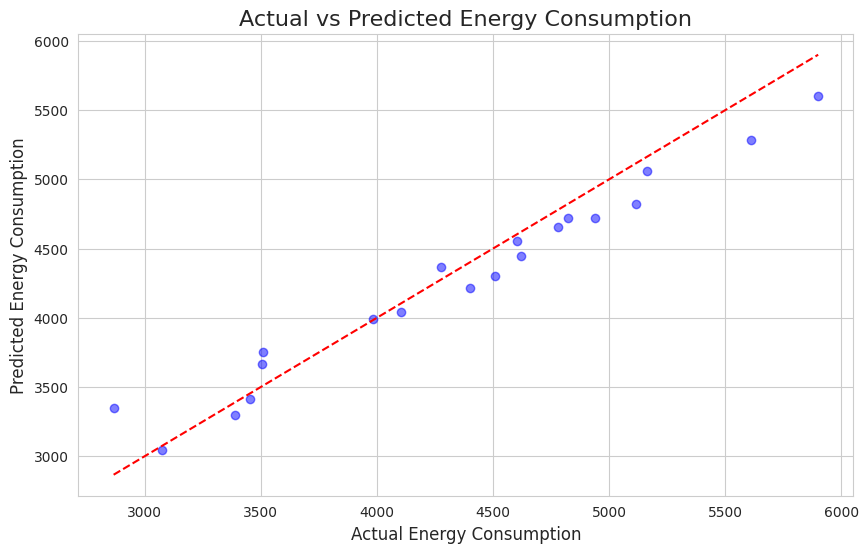

In [ ]:
# Actual vs Predicted

y_pred_final = best_gb_model.predict(x_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_final, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Energy Consumption', fontsize=16)
plt.xlabel('Actual Energy Consumption', fontsize=12)
plt.ylabel('Predicted Energy Consumption', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
# 5. Linear Regression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

y_pred_lr = lr_model.predict(x_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"RMSE for Linear Regression: {rmse_lr}")

RMSE for Linear Regression: 0.015852663332926675


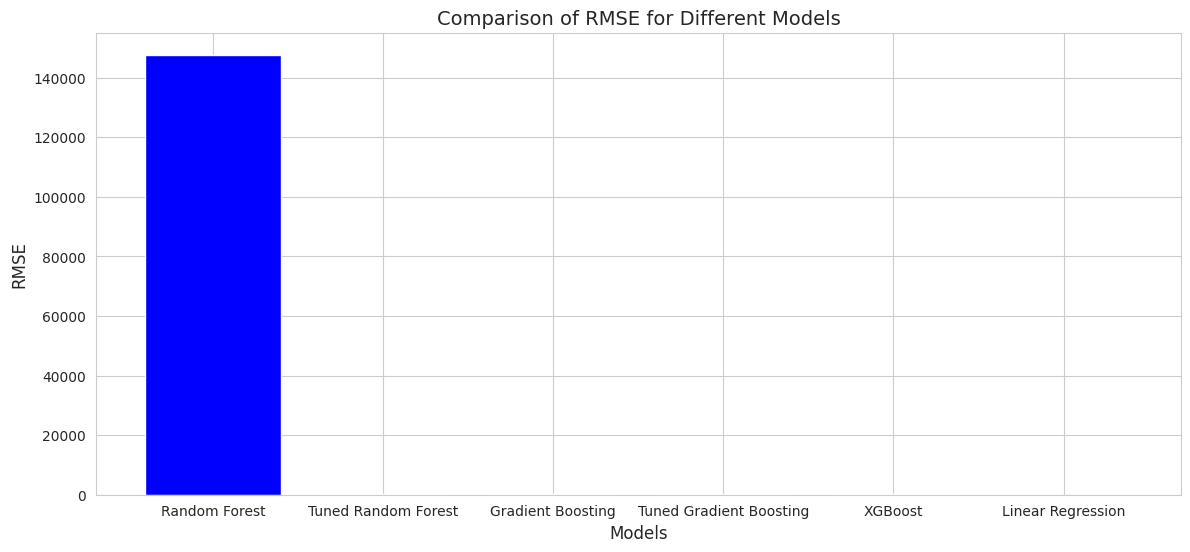

In [ ]:
#Wich Model has Low RMSE

models = ['Random Forest', 'Tuned Random Forest', 'Gradient Boosting', 'Tuned Gradient Boosting', 'XGBoost', 'Linear Regression']
rmse_value = [rmse_rf, rmse_best, rmse_gb, rmse_best_gb, rmse_xgb, rmse_lr]

plt.figure(figsize=(14, 6))
plt.bar(models, rmse_value, color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'])
plt.xlabel('Models', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('Comparison of RMSE for Different Models', fontsize=14)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

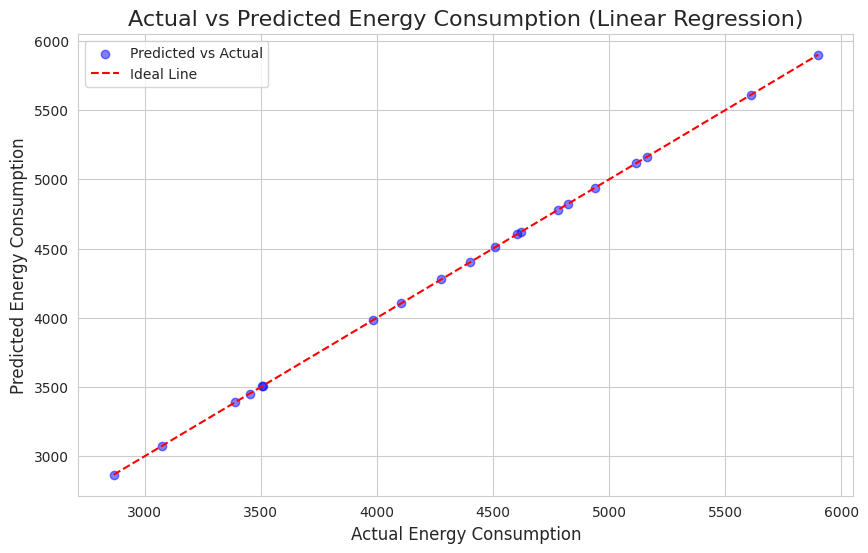

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Energy Consumption', fontsize=12)
plt.ylabel('Predicted Energy Consumption', fontsize=12)
plt.title('Actual vs Predicted Energy Consumption (Linear Regression)', fontsize=16)
plt.legend()
plt.grid(True)
plt.show

In [ ]:
df_actual_predicted_lr = pd.DataFrame({
    'Actual Energy Consumption': y_test,
    'Predicted Energy Consumption (LR)': y_pred_lr
})

print(df_actual_predicted_lr.head())

    Actual Energy Consumption  Predicted Energy Consumption (LR)
83                    5900.32                        5900.293568
53                    3072.63                        3072.648924
70                    4103.39                        4103.391595
45                    3506.64                        3506.647788
44                    4276.25                        4276.251448
